In [1]:
#Standard libraries for data analysis:
    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
import seaborn as sn
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas.util.testing as tm


C:\Users\minik\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# sklearn modules for data preprocessing:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#sklearn modules for Model Evaluation & Improvement:
from sklearn.metrics import  accuracy_score 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve


In [3]:
#import data from my disk
data = pd.read_csv('C:/temp/analiza_danych/churn_assessment_task.csv')
data

,legal_entity_customer_number,banding,credit_risk_rating_description,exist_days,prod_mix_m1,prod_mix_m2,prod_mix_m3,prod_mix_m4,prod_mix_m5,prod_mix_m6,...,volume_m1,volume_m2,volume_m3,volume_m4,volume_m5,volume_m6,volume_m7,volume_m8,volume_m9,churn_label
0,1,D,B - Medium,6790,4,5,4,6,4,5,...,127.31,176.26,393.12,177.61,449.85,432.68,340.65,303.25,130.27,0
1,2,A,B - Medium,6827,13,12,13,12,13,13,...,76374.51,91474.95,91265.66,77123.13,87592.74,99156.59,98943.65,92565.49,96622.74,0
2,3,B,B - Medium,6874,11,11,10,12,9,8,...,45197.42,49695.54,52526.49,50446.21,52330.68,60659.14,52033.52,53419.82,53571.81,0
3,4,B,B - Medium,6906,9,11,11,9,10,9,...,3730.18,1985.29,2576.95,2125.07,2195.37,1833.97,450.36,640.08,963.88,0
4,5,B,B - Medium,6867,7,6,4,3,5,7,...,5855.45,3885.67,813.76,379.75,651.17,8363.76,1202.34,258.23,320.40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4637,4638,C,F - Other,208,0,0,1,1,1,1,...,0.00,0.00,8.61,12.17,12.08,13.11,18.10,13.44,20.30,0
4638,4639,D,B - Medium,223,0,0,9,4,5,8,...,0.00,0.00,1451.50,775.42,815.35,1410.06,1359.18,1538.01,2103.44,0
4639,4640,C,F - Other,222,0,0,1,3,2,3,...,0.00,0.00,14.58,31.28,60.96,90.62,36.87,64.39,41.82,0
4640,4641,C,F - Other,221,0,0,4,3,3,5,...,0.00,0.00,92.15,59.37,95.98,154.96,203.02,145.44,112.42,0


In [4]:
#quick describe method
data.describe()

,legal_entity_customer_number,exist_days,prod_mix_m1,prod_mix_m2,prod_mix_m3,prod_mix_m4,prod_mix_m5,prod_mix_m6,prod_mix_m7,prod_mix_m8,...,volume_m1,volume_m2,volume_m3,volume_m4,volume_m5,volume_m6,volume_m7,volume_m8,volume_m9,churn_label
count,4642.000000,4642.000000,4642.000000,4642.000000,4642.000000,4642.000000,4642.000000,4642.000000,4642.000000,4642.000000,...,4642.000000,4642.000000,4642.000000,4642.000000,4642.000000,4642.000000,4642.000000,4642.000000,4.642000e+03,4642.00000
mean,2320.671047,2608.944636,5.324429,5.297286,5.022835,4.211978,4.714778,5.062688,5.218871,5.122361,...,6351.048458,6435.548044,6417.486504,4876.679817,5332.225060,5675.807247,6031.405872,5467.385595,6.052106e+03,0.01788
std,1340.416856,1725.971799,3.568501,3.481033,3.409860,3.239536,3.290580,3.331591,3.386464,3.322386,...,35243.437365,34457.142561,36739.295935,31910.585066,32269.592145,32452.887666,35068.148373,32969.822981,3.581380e+04,0.13253
min,1.000000,208.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-809.240000,0.000000,0.000000,0.000000,-4412.970000,0.000000,0.000000e+00,0.00000
25%,1160.250000,1032.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,...,81.285000,89.305000,66.805000,30.597500,56.200000,75.562500,86.707500,80.572500,7.927750e+01,0.00000
50%,2320.500000,2341.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,5.000000,5.000000,...,602.120000,633.315000,557.360000,277.865000,448.975000,518.225000,550.380000,474.100000,5.506350e+02,0.00000
75%,3480.750000,3841.000000,7.750000,7.000000,7.000000,6.000000,7.000000,7.000000,7.000000,7.000000,...,2742.447500,2887.612500,2668.270000,1690.892500,2193.605000,2514.520000,2660.867500,2276.987500,2.625045e+03,0.00000
max,4642.000000,7045.000000,22.000000,23.000000,22.000000,21.000000,23.000000,23.000000,26.000000,25.000000,...,715274.380000,699595.950000,727513.700000,795750.540000,757779.100000,735402.180000,864354.910000,916504.900000,1.008560e+06,1.00000


In [5]:
#function showing information about data  
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4642 entries, 0 to 4641
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   legal_entity_customer_number    4642 non-null   int64  
 1   banding                         4642 non-null   object 
 2   credit_risk_rating_description  4642 non-null   object 
 3   exist_days                      4642 non-null   int64  
 4   prod_mix_m1                     4642 non-null   int64  
 5   prod_mix_m2                     4642 non-null   int64  
 6   prod_mix_m3                     4642 non-null   int64  
 7   prod_mix_m4                     4642 non-null   int64  
 8   prod_mix_m5                     4642 non-null   int64  
 9   prod_mix_m6                     4642 non-null   int64  
 10  prod_mix_m7                     4642 non-null   int64  
 11  prod_mix_m8                     4642 non-null   int64  
 12  prod_mix_m9                     46

In [6]:
#checking for blank values in the data
data.isna().any()

legal_entity_customer_number      False
banding                           False
credit_risk_rating_description    False
exist_days                        False
prod_mix_m1                       False
prod_mix_m2                       False
prod_mix_m3                       False
prod_mix_m4                       False
prod_mix_m5                       False
prod_mix_m6                       False
prod_mix_m7                       False
prod_mix_m8                       False
prod_mix_m9                       False
sites_visited_m1                  False
sites_visited_m2                  False
sites_visited_m3                  False
sites_visited_m4                  False
sites_visited_m5                  False
sites_visited_m6                  False
sites_visited_m7                  False
sites_visited_m8                  False
sites_visited_m9                  False
volume_m1                         False
volume_m2                         False
volume_m3                         False


In [7]:
#obtaining information about columns 
print(data['credit_risk_rating_description'].nunique())
print(data['credit_risk_rating_description'].unique())
print(data['banding'].nunique())
print(data['banding'].unique())

5
['B - Medium' 'C - High Risk' 'A - Low Risk' 'D - No Unsecured credit'
 'F - Other']
4
['D' 'A' 'B' 'C']


In [8]:
#checking how many churn clients there are 
data['churn_label'].value_counts()

0    4559
1      83
Name: churn_label, dtype: int64

In [9]:
#checking how many customers there are with specific credit risk 
data_risk=data['credit_risk_rating_description'].value_counts()
data_risk

C - High Risk              2468
B - Medium                 1091
F - Other                   830
A - Low Risk                164
D - No Unsecured credit      89
Name: credit_risk_rating_description, dtype: int64

In [10]:
#checking how many customers there are with specific credit risk in churn_label = 1
filter=data['churn_label']==1 
churn_data=data[filter]
churn_risk=churn_data['credit_risk_rating_description'].value_counts()
churn_risk

C - High Risk              46
F - Other                  12
D - No Unsecured credit    12
B - Medium                  7
A - Low Risk                6
Name: credit_risk_rating_description, dtype: int64

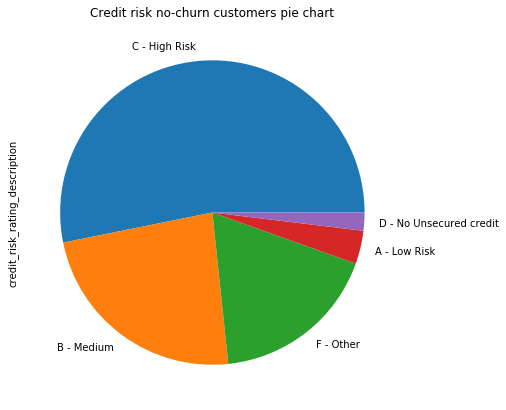

In [11]:

data_risk.plot(kind='pie',figsize=(7,7),title='Credit risk no-churn customers pie chart');

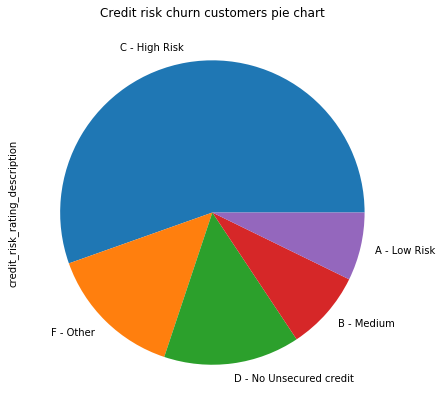

In [12]:
churn_risk.plot(kind='pie',figsize=(7,7),title='Credit risk churn customers pie chart');

In [13]:
#using previously declared data constructs two dataframes data risk and churn_risk
data_risk=pd.DataFrame(data['credit_risk_rating_description'].value_counts()).reset_index()
data_risk.rename(columns={'index':'Credit_Risk','credit_risk_rating_description':'Quantity'},inplace=True)

churn_risk=pd.DataFrame(churn_data['credit_risk_rating_description'].value_counts()).reset_index()
churn_risk.rename(columns={'index':'Credit_Risk','credit_risk_rating_description':'Quantity'},inplace=True)
churn_risk

,Credit_Risk,Quantity
0,C - High Risk,46
1,F - Other,12
2,D - No Unsecured credit,12
3,B - Medium,7
4,A - Low Risk,6


In [14]:
data_risk

,Credit_Risk,Quantity
0,C - High Risk,2468
1,B - Medium,1091
2,F - Other,830
3,A - Low Risk,164
4,D - No Unsecured credit,89


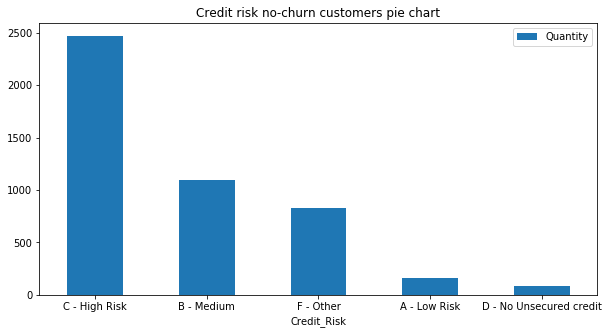

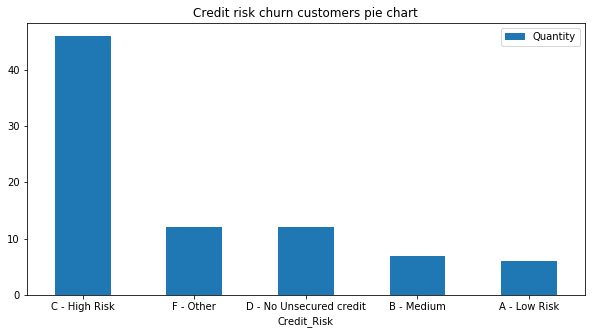

In [15]:
#comparison of the credit risk level in two groups, i.e. churn_label = 0 and churn_label = 1 
data_risk.plot.bar(x='Credit_Risk',figsize=(10,5),rot=0,
                   title='Credit risk no-churn customers pie chart');

churn_risk.plot.bar(x='Credit_Risk',figsize=(10,5),rot=0,
                    title='Credit risk churn customers pie chart',);

In [16]:
#comparing the credit risk at level D in two groups
percentCR=(churn_risk['Quantity'][1]/churn_risk['Quantity'].sum())*100
print("percent D-No Unsecured credit in churn customers: %.2f%%" %(percentCR))

percentDR=(data_risk['Quantity'][4]/data_risk['Quantity'].sum())*100
print("percent D-No Unsecured credit in normal customers: %.2f%%" %(percentDR))

percent D-No Unsecured credit in churn customers: 14.46%
percent D-No Unsecured credit in normal customers: 1.92%


In [17]:
#filters that will be used to separate data from the banding column
filter11=churn_data['exist_days'] > 365
filter12=churn_data['exist_days'] < 1095 

days_1year=churn_data[~filter11]
days_1year=len(days_1year['exist_days'].reset_index().drop(columns='index'))

days_3years=churn_data[filter11&filter12]
days_3years=len(days_3years['exist_days'].reset_index().drop(columns='index'))

churn_data[~filter11]

,legal_entity_customer_number,banding,credit_risk_rating_description,exist_days,prod_mix_m1,prod_mix_m2,prod_mix_m3,prod_mix_m4,prod_mix_m5,prod_mix_m6,...,volume_m1,volume_m2,volume_m3,volume_m4,volume_m5,volume_m6,volume_m7,volume_m8,volume_m9,churn_label
4548,4549,C,F - Other,327,2,7,2,0,3,2,...,49.30,122.00,44.42,0.00,26.31,51.22,56.35,0.00,30.10,1
4549,4550,C,D - No Unsecured credit,327,0,0,3,4,3,3,...,0.00,0.00,29.13,32.70,57.90,59.65,42.35,26.81,88.71,1
4554,4555,C,F - Other,321,2,2,1,2,2,2,...,321.76,156.54,102.81,212.86,148.40,97.87,128.83,49.17,183.07,1
4629,4630,B,D - No Unsecured credit,234,0,0,5,4,5,3,...,0.00,0.00,5067.99,5988.13,6072.28,3257.56,4219.44,11163.28,8923.39,1


In [18]:
days_higher=churn_data[~filter12]
days_higher=len(days_higher['exist_days'].reset_index().drop(columns='index'))
churn_data[~filter12]

,legal_entity_customer_number,banding,credit_risk_rating_description,exist_days,prod_mix_m1,prod_mix_m2,prod_mix_m3,prod_mix_m4,prod_mix_m5,prod_mix_m6,...,volume_m1,volume_m2,volume_m3,volume_m4,volume_m5,volume_m6,volume_m7,volume_m8,volume_m9,churn_label
77,78,C,C - High Risk,6175,4,5,4,5,4,6,...,3285.06,2589.52,2673.60,3229.02,3298.87,3965.44,-4412.97,3553.92,4699.76,1
101,102,C,D - No Unsecured credit,5991,6,6,7,2,4,6,...,361.82,299.89,191.54,7.59,0.00,228.23,487.28,282.48,394.96,1
179,180,D,A - Low Risk,5764,5,5,3,3,3,4,...,68.17,113.61,412.98,409.08,522.64,123.11,65.45,170.41,227.25,1
274,275,C,A - Low Risk,5527,2,3,3,3,3,4,...,1119.40,1183.81,1011.50,474.45,1093.42,1045.77,1650.52,1292.40,1029.61,1
486,487,D,C - High Risk,5073,2,2,2,1,2,1,...,177.10,205.92,278.57,53.11,268.07,206.19,157.45,53.25,122.18,1
490,491,D,C - High Risk,5064,3,3,3,1,0,0,...,87.73,14.62,29.98,47.02,0.00,0.00,8.77,133.72,103.10,1
540,541,D,C - High Risk,4939,4,6,4,3,4,4,...,1974.49,2750.18,2938.01,3231.74,3087.14,2396.79,2877.81,2735.70,2965.53,1
552,553,C,C - High Risk,4909,4,6,6,6,6,4,...,1072.82,2179.05,1872.82,1833.88,2378.79,1744.77,1747.31,2108.49,1461.20,1
633,634,D,C - High Risk,4745,2,4,3,2,0,4,...,22.13,45.58,20.34,11.47,0.00,19.17,11.54,0.00,17.36,1
639,640,A,A - Low Risk,4716,6,7,7,8,9,7,...,4150.35,3164.60,1929.92,1551.05,3870.92,2898.23,4142.59,3030.33,2036.13,1


In [19]:
#creating a dataframe based on the previous 3 variables 
d = {'Exist_status':['More then 3 years','Between 1 and 3 years','Less then 1 year'],
     'Quantity': [days_higher,days_3years,days_1year]}
df = pd.DataFrame(data=d)
df

,Exist_status,Quantity
0,More then 3 years,51
1,Between 1 and 3 years,28
2,Less then 1 year,4


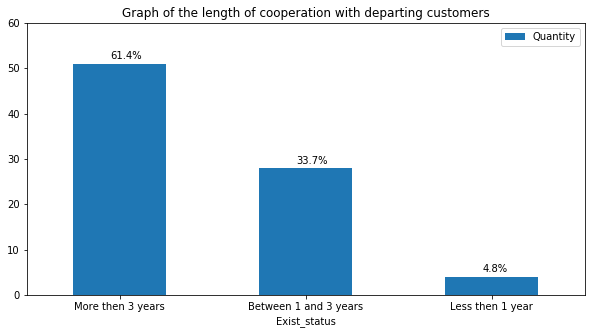

In [48]:
ax=df.plot.bar(x='Exist_status',
            figsize=(10,5),rot=0,
            title='Graph of the length of cooperation with departing customers',);
plt.ylim(0,60)

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/df['Quantity'].sum())
        x = p.get_x() + p.get_width() -0.3
        y = p.get_y() + p.get_height() + 1
        ax.annotate(percentage,(x, y))

In [21]:
churn_data

,legal_entity_customer_number,banding,credit_risk_rating_description,exist_days,prod_mix_m1,prod_mix_m2,prod_mix_m3,prod_mix_m4,prod_mix_m5,prod_mix_m6,...,volume_m1,volume_m2,volume_m3,volume_m4,volume_m5,volume_m6,volume_m7,volume_m8,volume_m9,churn_label
77,78,C,C - High Risk,6175,4,5,4,5,4,6,...,3285.06,2589.52,2673.60,3229.02,3298.87,3965.44,-4412.97,3553.92,4699.76,1
101,102,C,D - No Unsecured credit,5991,6,6,7,2,4,6,...,361.82,299.89,191.54,7.59,0.00,228.23,487.28,282.48,394.96,1
179,180,D,A - Low Risk,5764,5,5,3,3,3,4,...,68.17,113.61,412.98,409.08,522.64,123.11,65.45,170.41,227.25,1
274,275,C,A - Low Risk,5527,2,3,3,3,3,4,...,1119.40,1183.81,1011.50,474.45,1093.42,1045.77,1650.52,1292.40,1029.61,1
486,487,D,C - High Risk,5073,2,2,2,1,2,1,...,177.10,205.92,278.57,53.11,268.07,206.19,157.45,53.25,122.18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4497,4498,A,A - Low Risk,379,1,1,2,1,2,2,...,60.09,68.09,38.21,11.37,17.83,46.30,60.02,48.95,43.71,1
4548,4549,C,F - Other,327,2,7,2,0,3,2,...,49.30,122.00,44.42,0.00,26.31,51.22,56.35,0.00,30.10,1
4549,4550,C,D - No Unsecured credit,327,0,0,3,4,3,3,...,0.00,0.00,29.13,32.70,57.90,59.65,42.35,26.81,88.71,1
4554,4555,C,F - Other,321,2,2,1,2,2,2,...,321.76,156.54,102.81,212.86,148.40,97.87,128.83,49.17,183.07,1


In [22]:
banding=pd.DataFrame(churn_data['banding'].value_counts()).reset_index()
banding.rename(columns={'index':'Banding','banding':'Quantity'},inplace=True)
banding

,Banding,Quantity
0,D,42
1,C,28
2,B,9
3,A,4


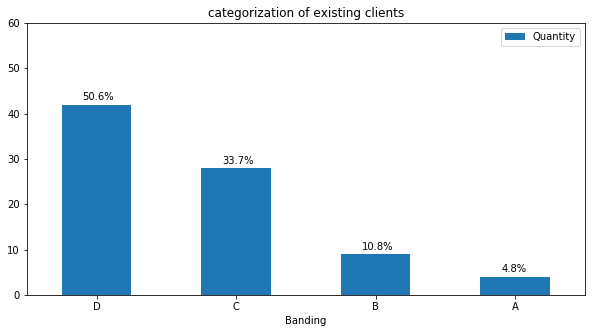

In [49]:
ax=banding.plot.bar(x='Banding',
            figsize=(10,5),rot=0,
            title='categorization of existing clients',);
plt.ylim(0,60)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/banding['Quantity'].sum())
        x = p.get_x() + p.get_width() -0.35
        y = p.get_y() + p.get_height() + 1
        ax.annotate(percentage,(x, y))

In [24]:
banding_A = churn_data.loc[churn_data['banding']=='A']
banding_A = banding_A.drop(columns = ['legal_entity_customer_number','banding',
                                      'credit_risk_rating_description','exist_days']).reset_index()
banding_A.drop(columns=['index'],inplace=True)

In [25]:
banding_A

,prod_mix_m1,prod_mix_m2,prod_mix_m3,prod_mix_m4,prod_mix_m5,prod_mix_m6,prod_mix_m7,prod_mix_m8,prod_mix_m9,sites_visited_m1,...,volume_m1,volume_m2,volume_m3,volume_m4,volume_m5,volume_m6,volume_m7,volume_m8,volume_m9,churn_label
0,6,7,7,8,9,7,7,7,7,4,...,4150.35,3164.60,1929.92,1551.05,3870.92,2898.23,4142.59,3030.33,2036.13,1
1,1,1,1,6,7,5,6,8,8,2,...,80.47,80.91,62.60,173.06,516.20,78.15,264.20,333.32,345.22,1
2,3,4,2,3,5,5,2,0,4,2,...,149427.18,143557.34,110215.53,4110.01,210.59,264.99,4.97,0.00,76.96,1
3,1,1,2,1,2,2,2,2,1,1,...,60.09,68.09,38.21,11.37,17.83,46.30,60.02,48.95,43.71,1


In [26]:
colnames=list(banding_A.columns)
banding_AA=np.array(banding_A)

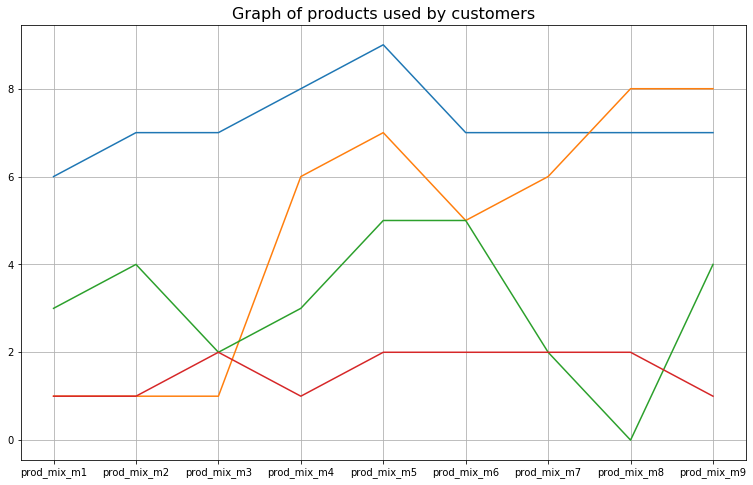

''

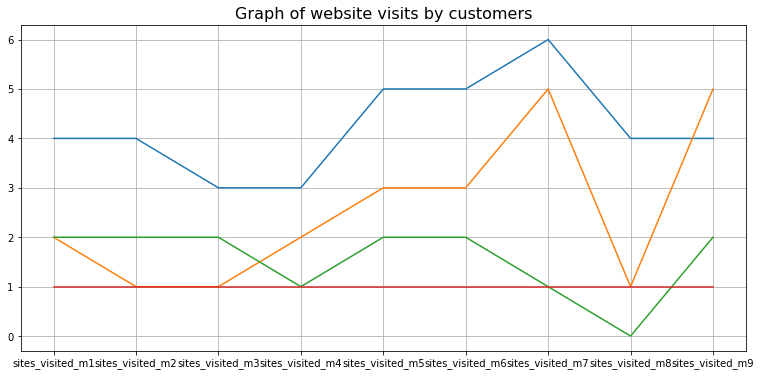

In [27]:
plt.figure(figsize=(13,8))
plt.title("Graph of products used by customers",fontsize=16) 
for i in range(4):
    plt.plot(colnames[:9],banding_AA[i,:9])
plt.grid()
plt.show()
plt.figure(figsize=(13,6))
plt.title("Graph of website visits by customers",fontsize=16)
for i in range(4):
    plt.plot(colnames[9:18],banding_AA[i,9:18])
plt.grid()


;

Text(0.5, 1.0, 'Customer purchases during the month')

<Figure size 720x432 with 0 Axes>

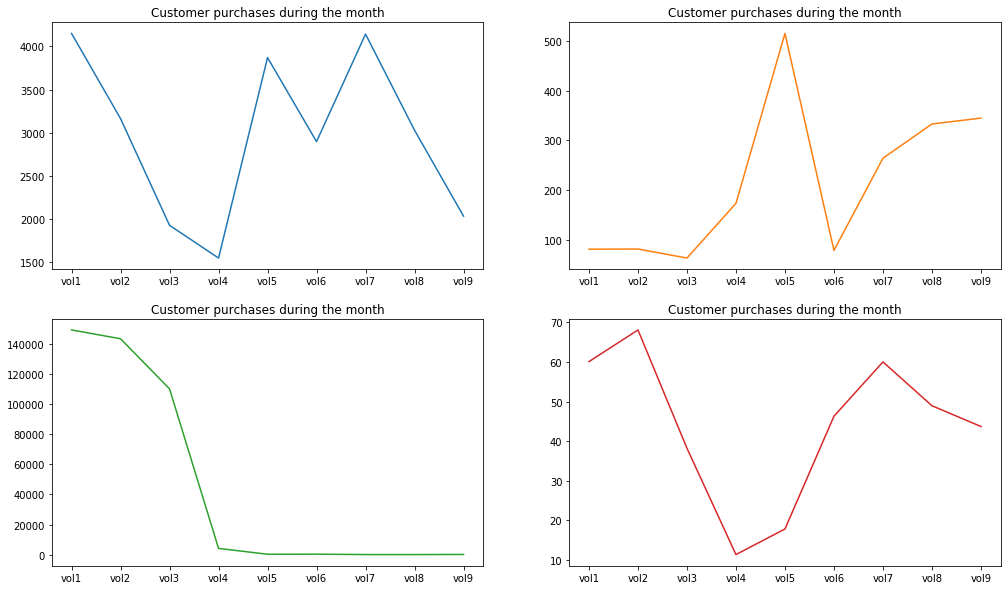

In [28]:
colnames = [w.replace('volume_m', 'vol') for w in colnames]
plt.figure(figsize=(10,6))
fig, axs = plt.subplots(2, 2,figsize=(17,10))
axs[0, 0].plot(colnames[18:27],banding_AA[0,18:27])
axs[0, 0].set_title('Customer purchases during the month')
axs[0, 1].plot(colnames[18:27],banding_AA[1,18:27], 'tab:orange')
axs[0, 1].set_title('Customer purchases during the month')
axs[1, 0].plot(colnames[18:27],banding_AA[2,18:27], 'tab:green')
axs[1, 0].set_title('Customer purchases during the month')
axs[1, 1].plot(colnames[18:27],banding_AA[3,18:27], 'tab:red')
axs[1, 1].set_title('Customer purchases during the month')



In [29]:
#Machine Learning model
#Create a label encoder object
le = LabelEncoder()
le_count = 0
for col in data.columns[1:]:
    if data[col].dtype == 'object':
        le.fit(data[col])
        data[col] = le.transform(data[col])
        le_count += 1
print('{} columns were label encoded.'.format(le_count))

2 columns were label encoded.


In [30]:
data

,legal_entity_customer_number,banding,credit_risk_rating_description,exist_days,prod_mix_m1,prod_mix_m2,prod_mix_m3,prod_mix_m4,prod_mix_m5,prod_mix_m6,...,volume_m1,volume_m2,volume_m3,volume_m4,volume_m5,volume_m6,volume_m7,volume_m8,volume_m9,churn_label
0,1,3,1,6790,4,5,4,6,4,5,...,127.31,176.26,393.12,177.61,449.85,432.68,340.65,303.25,130.27,0
1,2,0,1,6827,13,12,13,12,13,13,...,76374.51,91474.95,91265.66,77123.13,87592.74,99156.59,98943.65,92565.49,96622.74,0
2,3,1,1,6874,11,11,10,12,9,8,...,45197.42,49695.54,52526.49,50446.21,52330.68,60659.14,52033.52,53419.82,53571.81,0
3,4,1,1,6906,9,11,11,9,10,9,...,3730.18,1985.29,2576.95,2125.07,2195.37,1833.97,450.36,640.08,963.88,0
4,5,1,1,6867,7,6,4,3,5,7,...,5855.45,3885.67,813.76,379.75,651.17,8363.76,1202.34,258.23,320.40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4637,4638,2,4,208,0,0,1,1,1,1,...,0.00,0.00,8.61,12.17,12.08,13.11,18.10,13.44,20.30,0
4638,4639,3,1,223,0,0,9,4,5,8,...,0.00,0.00,1451.50,775.42,815.35,1410.06,1359.18,1538.01,2103.44,0
4639,4640,2,4,222,0,0,1,3,2,3,...,0.00,0.00,14.58,31.28,60.96,90.62,36.87,64.39,41.82,0
4640,4641,2,4,221,0,0,4,3,3,5,...,0.00,0.00,92.15,59.37,95.98,154.96,203.02,145.44,112.42,0


In [31]:
dataset2 = data
correlations = dataset2.corrwith(data.churn_label)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

print('Most Positive Correlations: \n', positive_correlations)
print('\nMost Negative Correlations: \n', negative_correlations)


Most Positive Correlations: 
 banding                           0.043878
legal_entity_customer_number      0.043467
credit_risk_rating_description    0.017160
dtype: float64

Most Negative Correlations: 
 volume_m1          -0.013888
volume_m2          -0.014815
volume_m3          -0.015851
volume_m4          -0.017792
volume_m5          -0.018716
volume_m8          -0.019358
volume_m6          -0.020161
volume_m9          -0.020305
volume_m7          -0.020355
sites_visited_m4   -0.037608
sites_visited_m5   -0.039170
sites_visited_m1   -0.042538
sites_visited_m3   -0.042699
sites_visited_m2   -0.042721
sites_visited_m6   -0.043706
sites_visited_m7   -0.044546
prod_mix_m5        -0.045617
sites_visited_m9   -0.045836
exist_days         -0.046240
prod_mix_m3        -0.046676
sites_visited_m8   -0.047022
prod_mix_m4        -0.047976
prod_mix_m6        -0.051339
prod_mix_m7        -0.051930
prod_mix_m2        -0.053559
prod_mix_m9        -0.057963
prod_mix_m1        -0.060107
prod_mix_m8 

Text(0.5, 1.0, 'Correlation with Churn Rate \n')

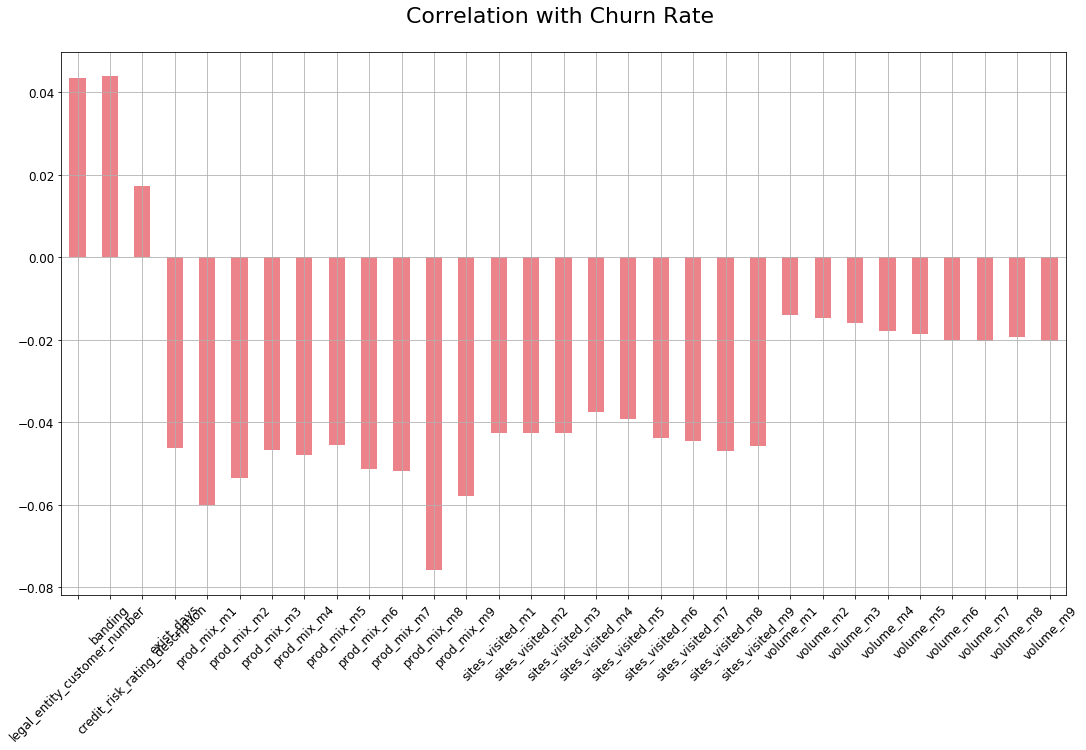

In [32]:
#Plot positive & negative correlations
correlations = dataset2.corrwith(data.churn_label)
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 12, 
        color = '#ec838a',
        rot = 45, grid = True)
plt.title('Correlation with Churn Rate \n',horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

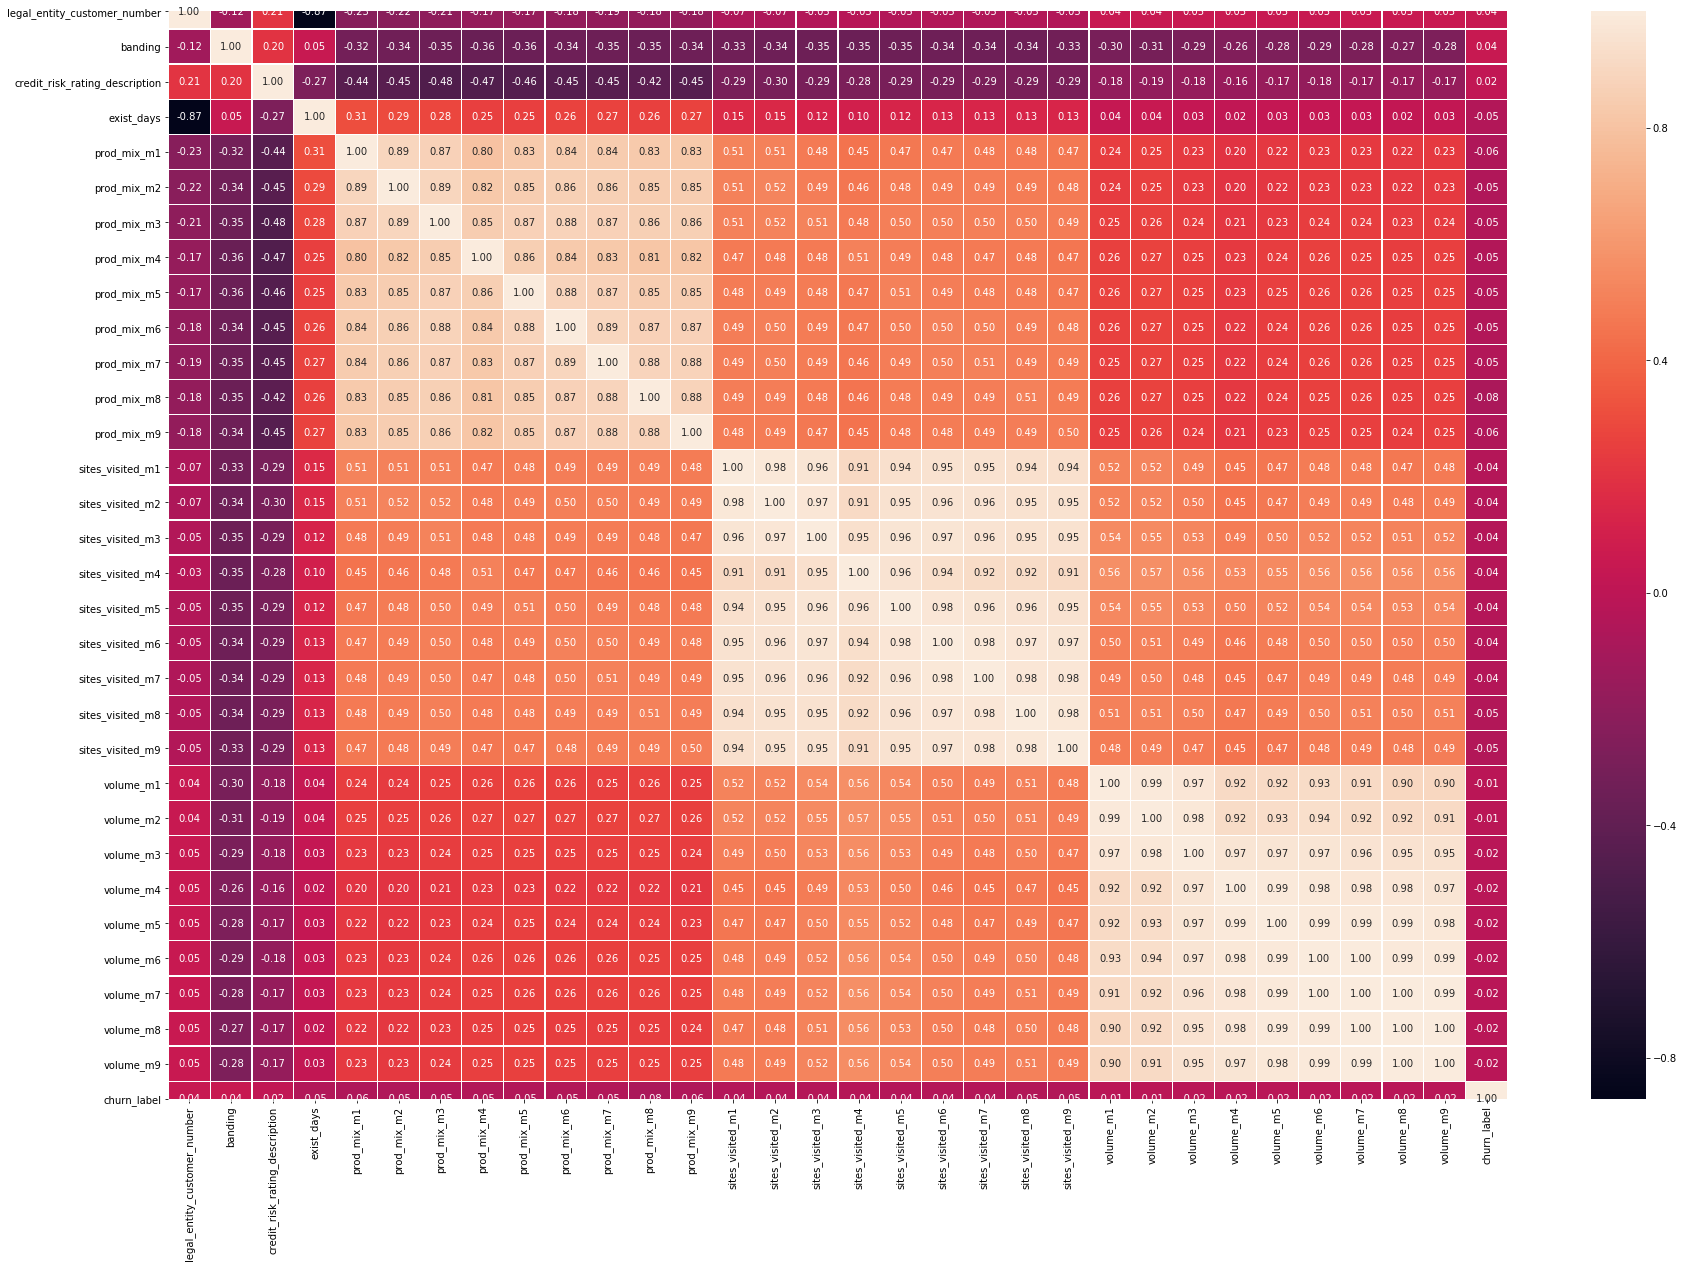

In [33]:
corr = data[data.columns].corr()
plt.figure(figsize = (30,20))
sn.heatmap(corr, annot = True, linewidths=0.2, fmt=".2f");

In [34]:
def calc_vif(X):
# Calculating VIF
        vif = pd.DataFrame()
        vif["variables"] = X.columns
        vif["VIF"] = [variance_inflation_factor(X.values, i) 
        for i in range(X.shape[1])]

        return(vif)

dataset2 = data[['exist_days','prod_mix_m1','prod_mix_m2','prod_mix_m3','prod_mix_m4','prod_mix_m5','prod_mix_m6',
                 'prod_mix_m7','prod_mix_m8','prod_mix_m9','sites_visited_m1','sites_visited_m2','sites_visited_m3',
                 'sites_visited_m4','sites_visited_m5','sites_visited_m6','sites_visited_m7','sites_visited_m8','sites_visited_m9',
                'volume_m1','volume_m2','volume_m3','volume_m4','volume_m5','volume_m6','volume_m7','volume_m8','volume_m9','churn_label']]
calc_vif(dataset2)

,variables,VIF
0,exist_days,2.818995
1,prod_mix_m1,21.790619
2,prod_mix_m2,27.076416
3,prod_mix_m3,27.276390
4,prod_mix_m4,14.862429
5,prod_mix_m5,23.036771
6,prod_mix_m6,26.885753
7,prod_mix_m7,27.880469
8,prod_mix_m8,23.985257
9,prod_mix_m9,23.985509


In [35]:
response = data["churn_label"]
data = data.drop(columns=["churn_label"])

In [36]:
X_train, X_test, y_train, y_test = train_test_split(data,response,stratify=response, test_size = 0.2)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (3713, 31)
Number transactions y_train dataset:  (3713,)
Number transactions X_test dataset:  (929, 31)
Number transactions y_test dataset:  (929,)


In [37]:
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

In [38]:
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear',class_weight='balanced')))
models.append(('SVC', SVC(kernel = 'linear')))
models.append(('Kernel SVM', SVC(kernel = 'rbf')))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier(criterion = 'entropy')))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion = 'entropy')))
#Evaluating Model Results:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)
i = 0
# Evaluate each model using k-fold cross-validation:
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10)
    # accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
    
model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,62.37,11.17,61.00,3.36
2,Kernel SVM,61.87,11.85,98.22,0.88
6,Random Forest,60.50,8.76,98.22,0.88
4,Gaussian NB,56.89,12.10,26.07,3.04
1,SVC,56.59,13.56,98.22,0.88
3,KNN,55.14,7.85,98.22,0.88
5,Decision Tree Classifier,55.00,8.50,96.42,0.89


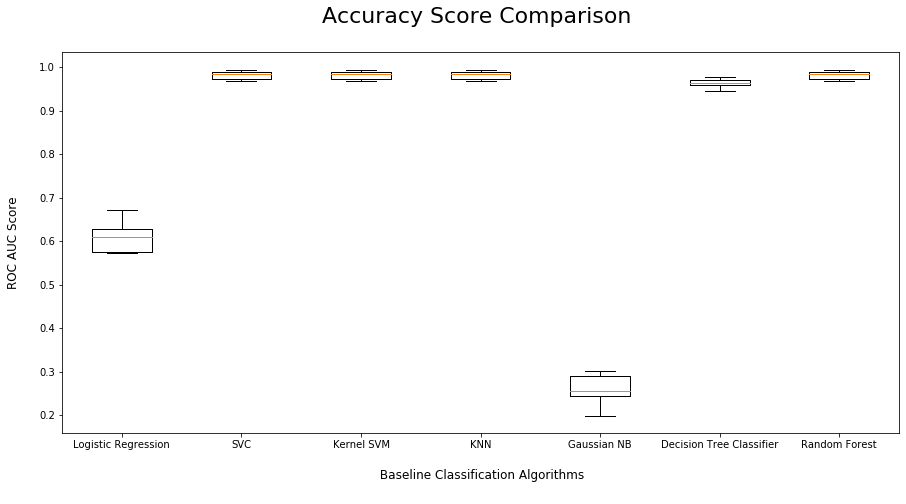

In [39]:
#box plot showing the effectiveness of a given algorithm 
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.ylabel('ROC AUC Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Baseline Classification Algorithms\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Accuracy Score Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")

plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

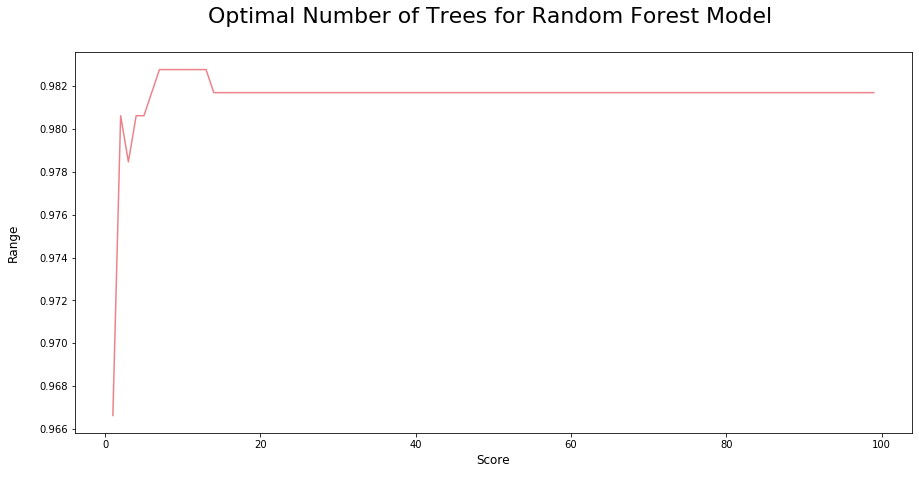

In [40]:

score_array = []
for each in range(1,100):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1) 
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X_test,y_test))
 
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,100),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")

plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

In [45]:
# Fitting Random Forest to the Training set:
    
classifier = RandomForestClassifier(n_estimators = 18, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred)

results = pd.DataFrame([['Random Forest', acc]], 
                       columns = ['Model', 'Accuracy'])

print(results)


           Model  Accuracy
0  Random Forest  0.981701


In [46]:
accuracies = cross_val_score(estimator = classifier,
 X = X_train, y = y_train, cv = 10)
print("Random Forest Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

Random Forest Classifier Accuracy: 0.98 (+/- 0.00)
